<a href="https://colab.research.google.com/github/RishithaSrija/Machine_Learning/blob/main/ML_Hyp_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import pandas as pd

df=sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
df.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [ ]:
import matplotlib.pyplot as plt
df.isnull()


,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6429,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6430,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.dropna().shape

(6341, 14)

In [38]:
df=df.dropna()

In [ ]:
df.reset_index(drop=True)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [ ]:
df.color.value_counts()

,count
color,
yellow,5451
green,982


In [ ]:
#tip is the Target column
#tip is numerical column
df.tip.value_counts()

,count
tip,
0.00,2311
1.00,312
2.00,211
2.16,89
1.86,79
...,...
3.84,1
0.90,1
0.10,1


<Axes: xlabel='color', ylabel='tip'>

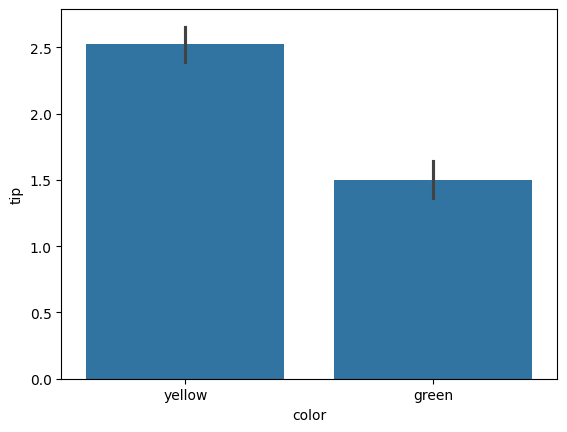

In [ ]:
#Graphical analysis of categorical
sns.barplot(x='color',y='tip',data=df,estimator='std')

#Insight-barplot
Here x-label has colors and y-label has tip values,Here w.r.t standard deviation tip value for yellow color are more than green color.The passengers travelled in yellow taxis are more as they are in more availability so they had collected higher tips.

<Axes: xlabel='tip', ylabel='Count'>

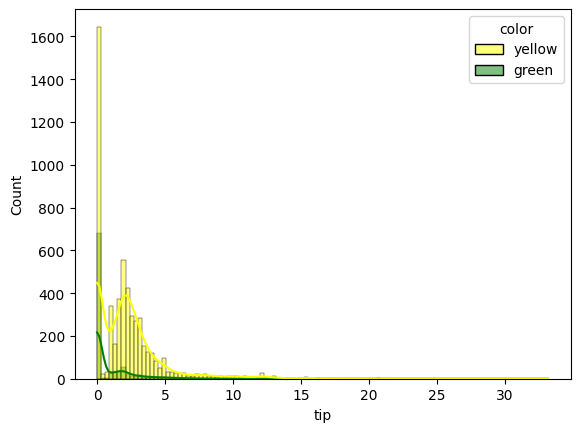

In [ ]:

palette = {'yellow': 'yellow', 'green': 'green'}
sns.histplot(x=df['tip'], hue=df['color'], kde=True, palette=palette)


#Insight-histogram plot

Here x-label contains tip amount and y-label contains count.
For smaller ranges of tip values count is higher and above 5 tip value , the counts are really low that show many of the passengers had give tip below 5 and there are very less passengers who had given more tip.

#

In [39]:
# Independent T-Test
from scipy import stats
yellow_tip = df[df['color']=='green']['tip']
green_tip = df[df['color']=='yellow']['tip']

t_stat, p_val = stats.ttest_ind(yellow_tip, green_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tip differs by color")
else:
    print("Fail to reject null hypothesis: No significant tip difference by color")


Independent T-Test statistic: -17.05932566128597
P-value: 7.791088119489451e-64
Reject null hypothesis: Tip differs by color


In [26]:
df.payment.value_counts()

,count
payment,
credit card,4577
cash,1812


In [35]:
card=df['tip'].loc[df['payment']=='credit card']
cash=df['tip'].loc[df['payment']=='cash']


Independent T-Test statistic: 49.09538452722153
P-value: 0.0
Reject null hypothesis: Tip differs by payment


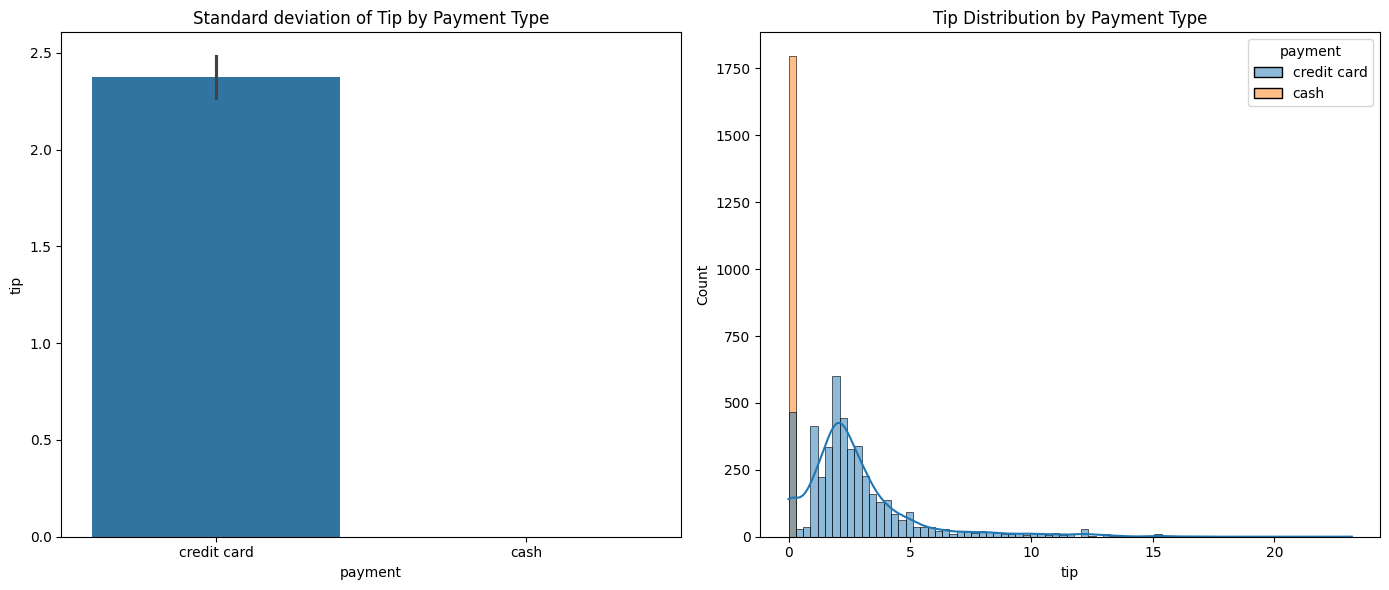

In [41]:
import numpy as np
credit_tip = df[df['payment'] == 'credit card']['tip']
cash_tip = df[df['payment'] == 'cash']['tip']

# Independent T-Test
t_stat, p_val = stats.ttest_ind(credit_tip, cash_tip)
print("Independent T-Test statistic:", t_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Tip differs by payment")
else:
    print("Fail to reject null hypothesis: No significant tip difference by payment")

# 1 row, 2 columns → two plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot
sns.barplot(data=df, x="payment", y="tip", estimator=np.std, ax=axes[0])
axes[0].set_title("Standard deviation of Tip by Payment Type")

# Histplot with KDE
sns.histplot(data=df, x="tip", hue="payment", kde=True, ax=axes[1], alpha=0.5)
axes[1].set_title("Tip Distribution by Payment Type")

plt.tight_layout()
plt.show()

In [43]:
df['pickup_borough'].value_counts()

,count
pickup_borough,
Manhattan,5226
Queens,638
Brooklyn,378
Bronx,99


/tmp/ipython-input-953540929.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['pickup_borough'],palette='Set1')


<Axes: xlabel='pickup_borough', ylabel='count'>

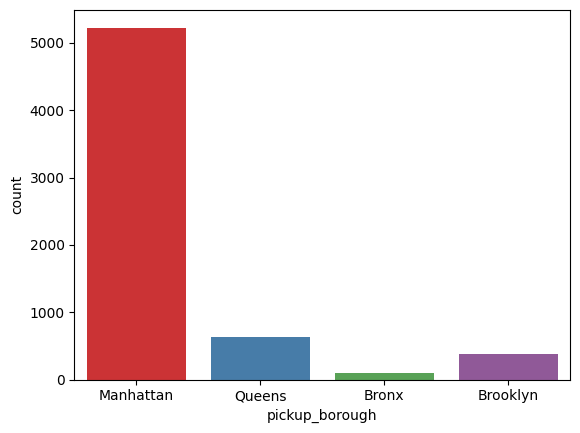

In [52]:
sns.countplot(x=df['pickup_borough'],palette='Set1')

/tmp/ipython-input-1864365659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.pickup_borough,y=df.tip,estimator=np.std,palette='rainbow')


<Axes: xlabel='pickup_borough', ylabel='tip'>

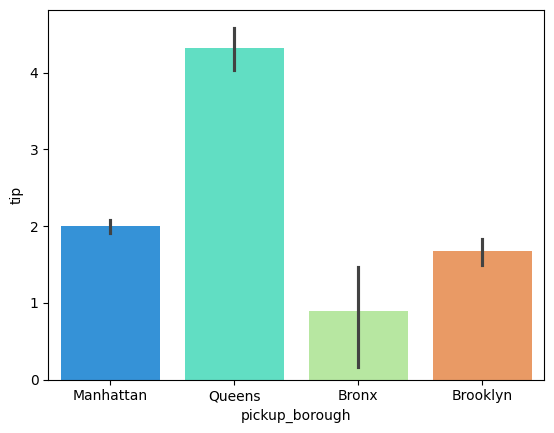

In [49]:

sns.barplot(x=df.pickup_borough,y=df.tip,estimator=np.std,palette='rainbow')

In [50]:
df['tip'].groupby(df['pickup_borough']).mean()

,tip
pickup_borough,
Bronx,0.148586
Brooklyn,0.979127
Manhattan,1.945597
Queens,3.066458


<Axes: xlabel='tip', ylabel='Count'>

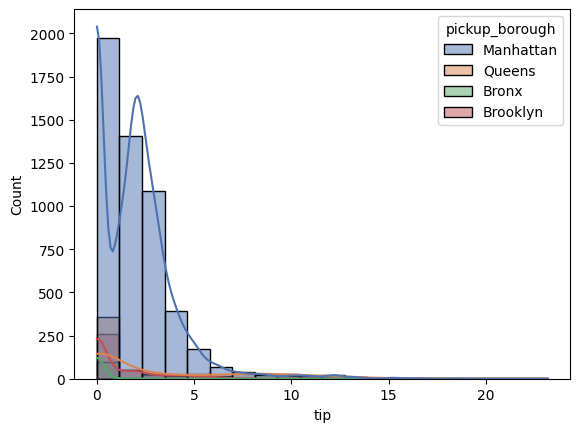

In [56]:
sns.histplot(x=df.tip,hue=df['pickup_borough'],bins=20,kde=True,palette='deep')

**Hypothesis**
- H0:Distribution of tip is same across all pickup_borough categories.
- H1:Atleast 1 category have different distribution of tip.

In [58]:
manhattan_tip=df['tip'][df['pickup_borough']=='Manhattan']
brooklyn_tip=df['tip'][df['pickup_borough']=='Brooklyn']
queens_tip=df['tip'][df['pickup_borough']=='Queens']
bronx_tip=df['tip'][df['pickup_borough']=='Bronx']
stat,p_value=stats.f_oneway(manhattan_tip,brooklyn_tip,queens_tip,bronx_tip)

In [61]:
#ANOVA test
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA test statistic:",f_stat)
print("P-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")


ANOVA test statistic: 91.5793383185057
P-value: 5.155109332422435e-58
Reject null hypothesis


In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df['tip'],groups=df['pickup_borough'],alpha=0.5)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.50  
  group1    group2  meandiff p-adj lower  upper  reject
-------------------------------------------------------
    Bronx  Brooklyn   0.8305 0.008 0.4652 1.1958   True
    Bronx Manhattan    1.797   0.0 1.4688 2.1253   True
    Bronx    Queens   2.9179   0.0 2.5684 3.2674   True
 Brooklyn Manhattan   0.9665   0.0 0.7941 1.1388   True
 Brooklyn    Queens   2.0873   0.0 1.8773 2.2973   True
Manhattan    Queens   1.1209   0.0 0.9852 1.2566   True
-------------------------------------------------------


**Hypothesis**
- H0:Distribution of tip is same across all dropoff_borough categories.
- H1:Atleast 1 category have different distribution of tip.

In [62]:
manhattan_tip=df['tip'][df['dropoff_borough']=='Manhattan']
brooklyn_tip=df['tip'][df['dropoff_borough']=='Brooklyn']
queens_tip=df['tip'][df['dropoff_borough']=='Queens']
bronx_tip=df['tip'][df['dropoff_borough']=='Bronx']
stat,p_value=stats.f_oneway(manhattan_tip,brooklyn_tip,queens_tip,bronx_tip)
f_stat,p_val=stats.f_oneway(manhattan_tip,queens_tip,bronx_tip,brooklyn_tip)
print("ANOVA test statistic:",f_stat)
print("P-value:",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

ANOVA test statistic: 23.78981400797117
P-value: 2.6378206902104746e-15
Reject null hypothesis


In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey=pairwise_tukeyhsd(endog=df['tip'],groups=df['dropoff_borough'],alpha=0.5)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.50      
  group1      group2    meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
    Bronx      Brooklyn   1.3869    0.0  1.0256  1.7482   True
    Bronx     Manhattan   1.4296    0.0  1.1053   1.754   True
    Bronx        Queens   1.8873    0.0  1.5287  2.2459   True
    Bronx Staten Island  13.6303    0.0 10.9708 16.2898   True
 Brooklyn     Manhattan   0.0427 0.9952 -0.1326  0.2181  False
 Brooklyn        Queens   0.5004 0.0055  0.2677  0.7332   True
 Brooklyn Staten Island  12.2434    0.0  9.5979 14.8889   True
Manhattan        Queens   0.4577 0.0002   0.288  0.6274   True
Manhattan Staten Island  12.2007    0.0    9.56 14.8414   True
   Queens Staten Island   11.743    0.0  9.0978 14.3881   True
--------------------------------------------------------------


In [66]:
#Anova test
cate=[group['tip'].values for name,group in df.groupby('pickup_zone')]
f_stat,p_val=stats.f_oneway(*cate)
print("P-values",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

P-values 7.892434822136223e-169
Reject null hypothesis


In [65]:
#Anova test
categ=[group['tip'].values for name,group in df.groupby('dropoff_zone')]
f_stat,p_val=stats.f_oneway(*categ)
print("P-values",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

P-values 1.3107168403745948e-120
Reject null hypothesis


<Axes: xlabel='tip', ylabel='Count'>

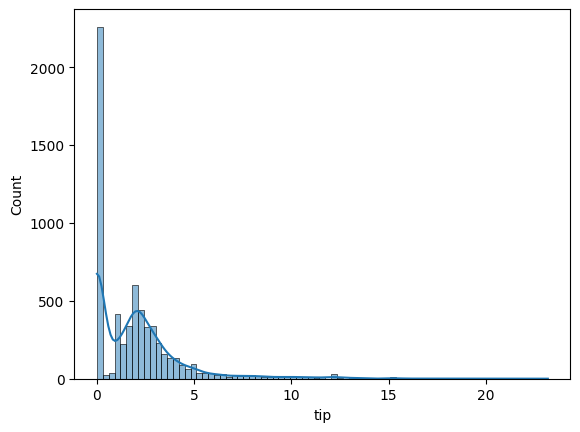

In [68]:
sns.histplot(df.tip,kde=True)

<Axes: xlabel='tip', ylabel='passengers'>

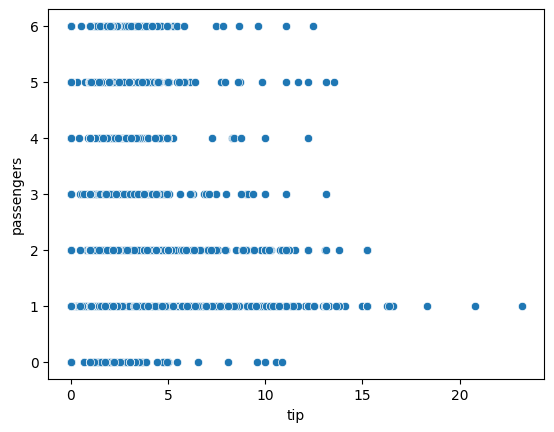

In [69]:
sns.scatterplot(x=df.tip,y=df.passengers)

<Axes: xlabel='tip', ylabel='fare'>

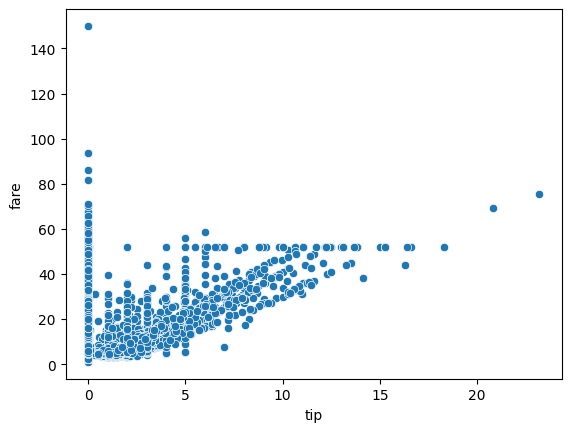

In [71]:
sns.scatterplot(x=df.tip,y=df.fare)

In [70]:
r,p_val=stats.pearsonr(df['tip'],df['fare'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.48710089077355956
P-value:  0.0
Reject null hypothesis


In [75]:
r,p_val=stats.spearmanr(df['tip'],df['distance'])
print("Correlation: ",r)
print("P-value: ",p_val)
alpha=0.05
if p_val<alpha:
  print("Reject null hypothesis")
else:
  print("Fail to reject null hypothesis")

Correlation:  0.29265085410043695
P-value:  1.9411181331374707e-125
Reject null hypothesis


<Axes: xlabel='tip', ylabel='distance'>

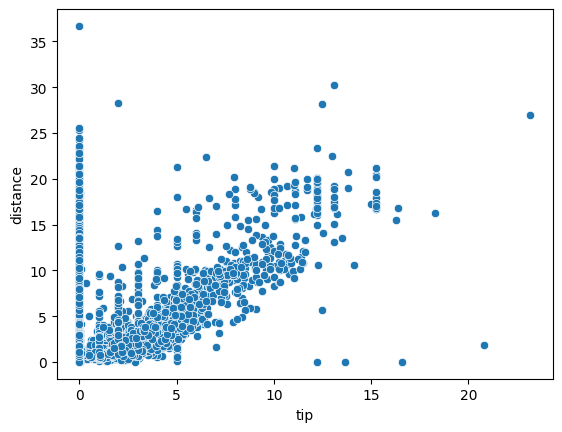

In [73]:
sns.scatterplot(x=df.tip,y=df.distance)

<Axes: xlabel='distance', ylabel='Count'>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


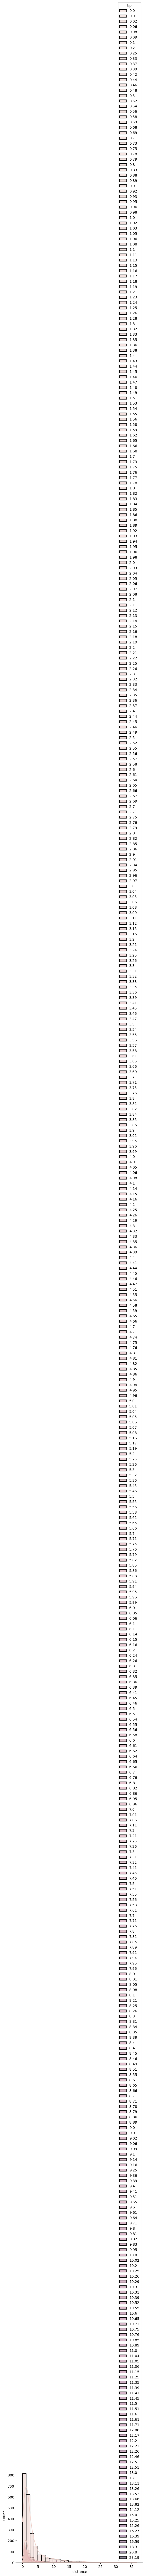

In [87]:
sns.histplot(hue=df.tip,x=df.distance,bins=30,kde=True)

<Axes: >

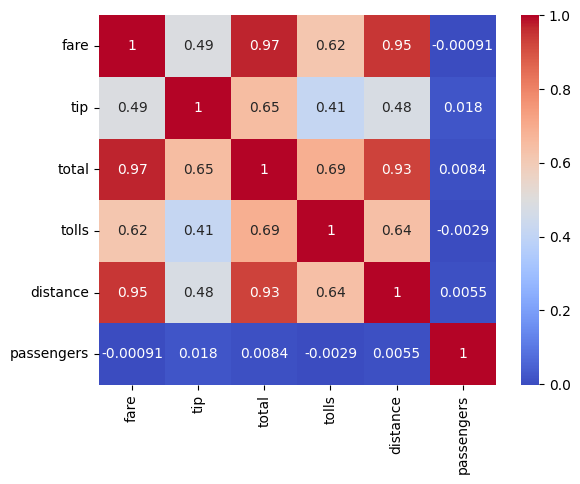

In [84]:
nm=df[['fare','tip','total','tolls','distance','passengers']]
sns.heatmap(nm.corr(),annot=True,cmap='coolwarm')